In [206]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [207]:
dataset = pd.read_csv('dataset-of-10s.csv')
dataset.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


In [208]:
dataset = dataset.drop(columns=['track','artist','uri'])
dataset.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


In [209]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [210]:
X['duration_ms'] = X['duration_ms']/(1000*60)
X.rename(columns={'duration_ms':'duration_mins'},inplace=True)

In [211]:
X.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,time_signature,chorus_hit,sections
count,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000
mean,0.568163,0.667756,5.283526,-7.589796,0.645514,0.098018,0.216928,0.165293,0.196700,0.443734,122.353871,3.945070,3.930916,41.028399,10.316505
std,0.191103,0.240721,3.606216,5.234592,0.478395,0.097224,0.296835,0.318736,0.166148,0.245776,29.847389,1.427283,0.377469,19.568827,3.776011
min,0.062200,0.000251,0.000000,-46.655000,0.000000,0.022500,0.000000,0.000000,0.016700,0.000000,39.369000,0.497550,0.000000,0.000000,2.000000
25%,0.447000,0.533000,2.000000,-8.425000,0.000000,0.038825,0.008533,0.000000,0.096800,0.240000,98.091250,3.220112,4.000000,28.059135,8.000000
50%,0.588000,0.712500,5.000000,-6.096500,1.000000,0.057200,0.067050,0.000017,0.126000,0.434000,121.070000,3.687442,4.000000,36.265365,10.000000
75%,0.710000,0.857000,8.000000,-4.601250,1.000000,0.112000,0.311000,0.057650,0.249000,0.628000,141.085000,4.321942,4.000000,48.292538,12.000000
max,0.981000,0.999000,11.000000,-0.149000,1.000000,0.956000,0.996000,0.995000,0.982000,0.976000,210.977000,28.903350,5.000000,213.154990,88.000000


In [212]:
X[X['duration_mins']==28.903350]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,time_signature,chorus_hit,sections
1430,0.163,0.00547,9,-34.284,0,0.0532,0.99,0.915,0.166,0.0367,138.046,28.90335,4,34.13513,88


In [213]:
y.value_counts()

1    3199
0    3199
Name: target, dtype: int64

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [215]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#sc.fit(X_train)
#sc.transform(X_train)
#sc.transform(X_test)

In [216]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(max_iter=1400)
logReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [217]:
y_pred = logReg.predict(X_test)

In [218]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_pred))
cf_matrix = confusion_matrix(y_test,y_pred)


0.81484375


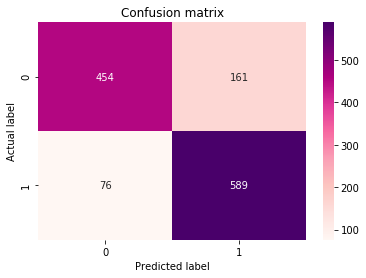

In [219]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="RdPu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Let's try using the Random Forest Classifier

In [220]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [221]:
y_pred = rf_classifier.predict(X_test)

In [222]:
print(accuracy_score(y_test,y_pred))

0.84609375


In [223]:
confusion_matrix(y_test,y_pred)

array([[500, 115],
       [ 82, 583]], dtype=int64)

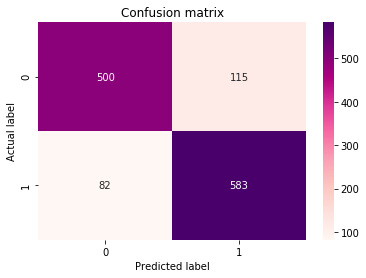

In [224]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)), annot=True, cmap="RdPu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [225]:
rf_classifier.feature_importances_

array([0.10122881, 0.09482208, 0.02455299, 0.10800638, 0.00639782,
       0.04803801, 0.0897581 , 0.23955008, 0.04112694, 0.06595086,
       0.04288718, 0.06599382, 0.00707724, 0.03846021, 0.02614948])

In [226]:
X_train.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_mins', 'time_signature', 'chorus_hit', 'sections'],
      dtype='object')

In [227]:
feat_imp = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(rf_classifier.feature_importances_)],axis=1)
feat_imp

,0,0
0,danceability,0.101229
1,energy,0.094822
2,key,0.024553
3,loudness,0.108006
4,mode,0.006398
5,speechiness,0.048038
6,acousticness,0.089758
7,instrumentalness,0.239550
8,liveness,0.041127
9,valence,0.065951


In [228]:
feat_imp.columns = ['Feature','Feature Importance']
feat_imp=feat_imp.set_index('Feature')
feat_imp=feat_imp.sort_values(by=['Feature Importance'],ascending=False)


In [229]:
feat_imp

,Feature Importance
Feature,
instrumentalness,0.239550
loudness,0.108006
danceability,0.101229
energy,0.094822
acousticness,0.089758
duration_mins,0.065994
valence,0.065951
speechiness,0.048038
tempo,0.042887


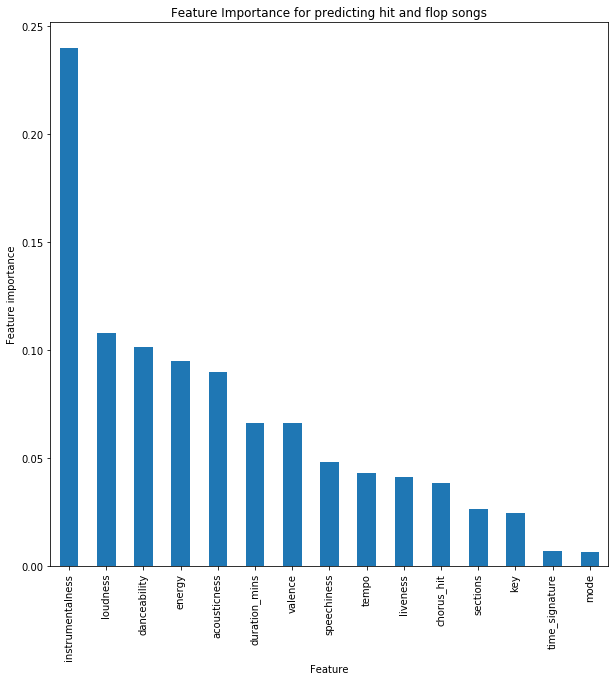

In [230]:

feat_imp.plot(kind='bar',title='Feature Importance for predicting hit and flop songs',legend=None,figsize=(10,10))
plt.ylabel('Feature importance')
plt.show()

Hit songs during the 2010s were mostly determined by their instrumentalness,loudness,acousticness,danceability and energy.